<a href="https://colab.research.google.com/github/NaruedechKlaikaew/SeniorProject/blob/main/Senior_Project_3_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Split train 70% / test 30%**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
#Read data
df = pd.read_csv('/content/Road-A.csv')
df

,date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,2019-06-01,NaN,NaN,NaN,NaN,NaN,NaN,0.643059,0.676740,0.733566,...,0.711398,0.647175,0.583293,0.536565,0.497574,0.637694,0.664751,0.647728,0.772849,1.000000
1,2019-06-02,0.838857,0.805945,1.000000,0.948304,0.907798,0.620463,0.563938,0.646087,0.586426,...,0.517674,0.553976,0.517437,0.476854,0.637440,0.603415,0.535578,0.494147,0.672816,0.724495
2,2019-06-03,0.708940,0.753129,0.608335,0.815792,1.000000,0.577042,0.472742,0.498413,0.415910,...,0.492745,0.429344,0.474278,0.500685,0.452180,0.463869,0.411601,0.413004,0.565188,0.668677
3,2019-06-04,0.727689,0.809786,1.000000,0.623470,0.935100,0.824306,0.465484,0.604144,0.442282,...,0.590306,0.538050,0.534511,0.463748,0.447126,0.552142,0.464541,0.495717,0.684194,0.724908
4,2019-06-05,0.517825,0.482381,0.581289,1.000000,0.541808,0.332906,0.370148,0.397321,0.385117,...,0.356251,0.271714,0.316044,0.363302,0.361825,0.321166,0.329947,0.357176,0.435441,0.420211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2019-08-27,0.458603,0.683205,0.578124,1.000000,0.651731,0.530787,0.253843,NaN,0.339623,...,0.333766,0.360501,0.347153,0.216733,NaN,NaN,NaN,0.298388,0.448192,0.472439
88,2019-08-28,0.823666,0.818217,0.910116,0.876474,1.000000,0.850955,0.682458,0.618197,0.657947,...,0.235651,0.560646,0.602109,0.256001,0.329834,0.531033,0.676274,0.608857,0.694096,0.847980
89,2019-08-29,0.741402,0.828867,1.000000,0.824966,0.803989,0.927787,0.530721,0.549004,0.623724,...,0.157733,0.177715,0.305762,0.243310,0.430736,0.549001,0.505945,0.560099,0.650410,0.724669
90,2019-08-30,0.549291,0.535847,NaN,0.484127,1.000000,0.411512,0.327523,0.292328,0.355156,...,0.202148,0.261852,0.315611,0.343005,0.397755,0.356381,0.356370,0.289779,0.454437,0.458446


In [ ]:
#remove Na
df = df.dropna(subset=['16', '17'], axis=0)

In [ ]:
tpi_1600_1700 = df['16'].to_numpy()
tpi_1700_1800 = df['17'].to_numpy()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

## ข้อมูล
#tpi_1600_1700 = np.array([
#    0.585778, 0.529397, 0.486217, 0.539534, 0.324536, 0.423162,
#    0.504860, 0.669509, 0.313202, 0.385571, 0.397315, 0.523061,
#    0.125395, 0.530853, 0.523048, 0.534201, 0.439380, 0.476023,
#    0.529871, 0.449240, 0.450066, 0.435791, 0.389944, 0.360856,
#    0.568279, 0.315324, 0.569456
#])
#
#tpi_1700_1800 = np.array([
#    0.548623, 0.479441, 0.517383, 0.479861, 0.366560, 0.596535,
#    0.532606, 0.556263, 0.422723, 0.444348, 0.492472, 0.576971,
#    0.189608, 0.352295, 0.624941, 0.481760, 0.333964, 0.469789,
#    0.415004, 0.507606, 0.397299, 0.385448, 0.398719, 0.368674,
#    0.507446, 0.150665, 0.537611
#])

# index ของข้อมูลทั้งหมด
n = len(tpi_1600_1700)
indices = np.arange(n)

# split 70% train, 30% test โดยใช้ shuffle
train_idx, test_idx = train_test_split(indices, test_size=0.3)

# แยกข้อมูลตาม index
x_train = tpi_1600_1700[train_idx]
y_train = tpi_1700_1800[train_idx]

x_test = tpi_1600_1700[test_idx]
y_test = tpi_1700_1800[test_idx]

# แสดงผลบางส่วนเพื่อดู
print("Train x:", x_train)
print("Train y:", y_train)
print("Test x:", x_test)
print("Test y:", y_test)

Train x: [0.29624125 0.22114945 0.29489928 0.44572329 0.6113885  0.4274385
 0.51114625 0.2937507  0.36515743 0.31120136 0.36080235 0.51453226
 0.57632774 0.39386358 0.49445233 0.57472297 0.45957869 0.45423181
 0.53423663 0.3091846  0.30576157 0.52064721 0.60210901 0.47693726
 0.44054849 0.53451076 0.36116456 0.69921242 0.41656326 0.12399877
 0.55480744 0.42192793 0.51636307 0.12122944 0.23593858 0.52201714
 0.48874179 0.4168991  0.40888053 0.49190873 0.42791708 0.35403705
 0.50301314 0.43202504 0.51743702 0.21069478 0.58329344 0.31561077
 0.14007821 0.38162531 0.37683101 0.13142817 0.66011187 0.50624796
 0.11926666 0.51431024 0.10416032 0.33144913 0.43371103 0.54850229
 0.69608205 0.32819946 0.62849723 0.66810988]
Train y: [0.35977238 0.45283717 0.54663326 0.49766025 0.57112088 0.52183585
 0.33968844 0.11532066 0.31042538 0.14927167 0.28266173 0.46412591
 0.57338908 0.24084761 0.41344452 0.49688619 0.21644461 0.39946689
 0.59490211 0.40956398 0.24331015 0.62654222 0.25600142 0.52832
 0

### **Linear**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
# --- Linear Regression Function สำหรับหลาย input ---
def linear_predict_batch(x_train, y_train, x_input_array):
    model = LinearRegression()
    model.fit(x_train.reshape(-1, 1), y_train)
    predictions = model.predict(x_input_array.reshape(-1, 1))
    return predictions

# --- เรียกใช้งาน: ทำนาย y_test จาก x_test ---
y_pred_test = linear_predict_batch(x_train, y_train, x_test)

# --- แสดงผล ---
for i, (x_val, y_true, y_pred) in enumerate(zip(x_test, y_test, y_pred_test), 1):
    print(f"Day {i}:")
    print(f"  Input TPI 16-17 : {x_val:.6f}")
    print(f"  True   TPI 17-18: {y_true:.6f}")
    print(f"  Pred   TPI 17-18: {y_pred:.6f}")
    print()

Day 1:
  Input TPI 16-17 : 0.416439
  True   TPI 17-18: 0.590602
  Pred   TPI 17-18: 0.377537

Day 2:
  Input TPI 16-17 : 0.514170
  True   TPI 17-18: 0.574025
  Pred   TPI 17-18: 0.448182

Day 3:
  Input TPI 16-17 : 0.303024
  True   TPI 17-18: 0.588172
  Pred   TPI 17-18: 0.295556

Day 4:
  Input TPI 16-17 : 0.311282
  True   TPI 17-18: 0.188872
  Pred   TPI 17-18: 0.301525

Day 5:
  Input TPI 16-17 : 0.518357
  True   TPI 17-18: 0.414453
  Pred   TPI 17-18: 0.451208

Day 6:
  Input TPI 16-17 : 0.567178
  True   TPI 17-18: 0.530449
  Pred   TPI 17-18: 0.486498

Day 7:
  Input TPI 16-17 : 0.247817
  True   TPI 17-18: 0.132023
  Pred   TPI 17-18: 0.255649

Day 8:
  Input TPI 16-17 : 0.508628
  True   TPI 17-18: 0.493469
  Pred   TPI 17-18: 0.444176

Day 9:
  Input TPI 16-17 : 0.363480
  True   TPI 17-18: 0.273540
  Pred   TPI 17-18: 0.339256

Day 10:
  Input TPI 16-17 : 0.486501
  True   TPI 17-18: 0.536661
  Pred   TPI 17-18: 0.428181

Day 11:
  Input TPI 16-17 : 0.497454
  True   TPI

### **Bayesian H1/H2**

In [ ]:
# --- Bayesian Prediction แบบ batch ---
def bayesian_predict_batch(x_train, y_train, x_input_array, threshold=0.48, bandwidth=0.12):
    df_train = pd.DataFrame({
        'x': x_train,
        'y': y_train
    })
    df_train['H'] = np.where(df_train['y'] >= threshold, 'H1', 'H2')

    P_H1 = np.mean(df_train['H'] == 'H1')
    P_H2 = np.mean(df_train['H'] == 'H2')

    h1 = df_train[df_train['H'] == 'H1']
    h2 = df_train[df_train['H'] == 'H2']

    x1 = h1['y'].mean()
    x2 = h2['y'].mean()

    predictions = []
    for new_input in x_input_array:
        P_x_given_H1 = np.mean(np.abs(h1['x'] - new_input) <= bandwidth)
        P_x_given_H2 = np.mean(np.abs(h2['x'] - new_input) <= bandwidth)

        numerator_H1 = P_x_given_H1 * P_H1
        numerator_H2 = P_x_given_H2 * P_H2
        evidence = numerator_H1 + numerator_H2

        if evidence > 0:
            post_H1 = numerator_H1 / evidence
            post_H2 = numerator_H2 / evidence
            y_pred = post_H1 * x1 + post_H2 * x2
        else:
            idx = np.argmin(np.abs(x_train - new_input))
            y_pred = y_train[idx]

        predictions.append(y_pred)

    return np.array(predictions)

# --- เรียกใช้งานกับ x_test ที่มีอยู่แล้ว ---
y_pred_bayes = bayesian_predict_batch(x_train, y_train, x_test)

# --- แสดงผลแบบเดียวกับ Linear Regression ---
for i, (x_val, y_true, y_pred) in enumerate(zip(x_test, y_test, y_pred_bayes), 1):
    print(f"Day {i}:")
    print(f"  Input TPI 16-17 : {x_val:.6f}")
    print(f"  True   TPI 17-18: {y_true:.6f}")
    print(f"  Pred   TPI 17-18: {y_pred:.6f}")
    print()

Day 1:
  Input TPI 16-17 : 0.416439
  True   TPI 17-18: 0.590602
  Pred   TPI 17-18: 0.368605

Day 2:
  Input TPI 16-17 : 0.514170
  True   TPI 17-18: 0.574025
  Pred   TPI 17-18: 0.416084

Day 3:
  Input TPI 16-17 : 0.303024
  True   TPI 17-18: 0.588172
  Pred   TPI 17-18: 0.326269

Day 4:
  Input TPI 16-17 : 0.311282
  True   TPI 17-18: 0.188872
  Pred   TPI 17-18: 0.334787

Day 5:
  Input TPI 16-17 : 0.518357
  True   TPI 17-18: 0.414453
  Pred   TPI 17-18: 0.416084

Day 6:
  Input TPI 16-17 : 0.567178
  True   TPI 17-18: 0.530449
  Pred   TPI 17-18: 0.437062

Day 7:
  Input TPI 16-17 : 0.247817
  True   TPI 17-18: 0.132023
  Pred   TPI 17-18: 0.329086

Day 8:
  Input TPI 16-17 : 0.508628
  True   TPI 17-18: 0.493469
  Pred   TPI 17-18: 0.413307

Day 9:
  Input TPI 16-17 : 0.363480
  True   TPI 17-18: 0.273540
  Pred   TPI 17-18: 0.348298

Day 10:
  Input TPI 16-17 : 0.486501
  True   TPI 17-18: 0.536661
  Pred   TPI 17-18: 0.400350

Day 11:
  Input TPI 16-17 : 0.497454
  True   TPI

### **Bayesian KDE**

In [ ]:
import numpy as np
from scipy.stats import norm, gaussian_kde

# ===== INPUT: x_train, y_train, x_test, y_test =====

tau = np.std(x_train - y_train)
v_min = y_train.min() - 0.05
v_max = y_train.max() + 0.05
v_grid = np.linspace(v_min, v_max, 3000)

prior_kde = gaussian_kde(y_train)

def bayesian_kde_predict(x_obs):
    prior_pdf = prior_kde(v_grid)
    likelihood_pdf = norm.pdf(x_obs, loc=v_grid, scale=tau)
    unnormalized = likelihood_pdf * prior_pdf
    posterior_pdf = unnormalized / np.trapezoid(unnormalized, v_grid)
    expected = np.trapezoid(v_grid * posterior_pdf, v_grid)
    return expected

y_pred_bayes_kde = np.array([bayesian_kde_predict(x) for x in x_test])

for i, (x_val, y_true, y_pred) in enumerate(zip(x_test, y_test, y_pred_bayes_kde), 1):
    print(f"Day {i}:")
    print(f"  Input TPI 16-17 : {x_val:.6f}")
    print(f"  True   TPI 17-18: {y_true:.6f}")
    print(f"  Pred   TPI 17-18 (Bayesian w/ KDE): {y_pred:.6f}")
    print()

Day 1:
  Input TPI 16-17 : 0.416439
  True   TPI 17-18: 0.590602
  Pred   TPI 17-18 (Bayesian w/ KDE): 0.418693

Day 2:
  Input TPI 16-17 : 0.514170
  True   TPI 17-18: 0.574025
  Pred   TPI 17-18 (Bayesian w/ KDE): 0.480025

Day 3:
  Input TPI 16-17 : 0.303024
  True   TPI 17-18: 0.588172
  Pred   TPI 17-18 (Bayesian w/ KDE): 0.333075

Day 4:
  Input TPI 16-17 : 0.311282
  True   TPI 17-18: 0.188872
  Pred   TPI 17-18 (Bayesian w/ KDE): 0.339838

Day 5:
  Input TPI 16-17 : 0.518357
  True   TPI 17-18: 0.414453
  Pred   TPI 17-18 (Bayesian w/ KDE): 0.482428

Day 6:
  Input TPI 16-17 : 0.567178
  True   TPI 17-18: 0.530449
  Pred   TPI 17-18 (Bayesian w/ KDE): 0.509133

Day 7:
  Input TPI 16-17 : 0.247817
  True   TPI 17-18: 0.132023
  Pred   TPI 17-18 (Bayesian w/ KDE): 0.286710

Day 8:
  Input TPI 16-17 : 0.508628
  True   TPI 17-18: 0.493469
  Pred   TPI 17-18 (Bayesian w/ KDE): 0.476816

Day 9:
  Input TPI 16-17 : 0.363480
  True   TPI 17-18: 0.273540
  Pred   TPI 17-18 (Bayesian w/

### **กราฟเปรียบเทียบ**

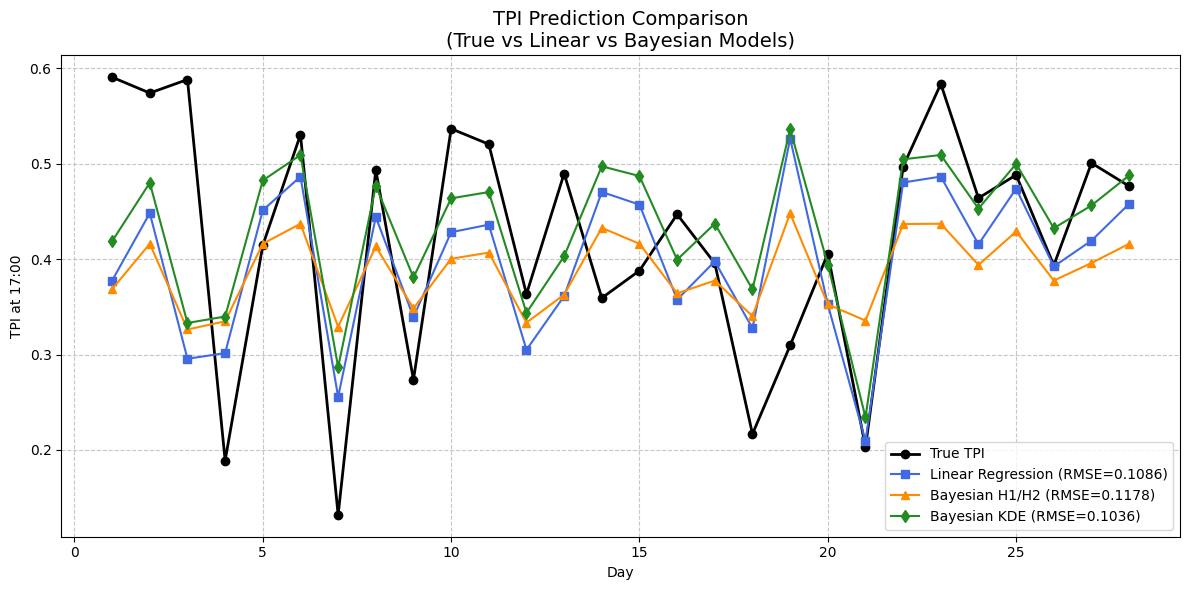

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === สร้าง DataFrame ===
df_result = pd.DataFrame({
    "Day": np.arange(1, len(y_test) + 1),
    "True_TPI": y_test,
    "Linear_Pred": y_pred_test,
    "Bayes_H1H2_Pred": y_pred_bayes,
    "Bayes_KDE_Pred": y_pred_bayes_kde
})

# === คำนวณ RMSE แบบไม่ใช้ squared=False (รองรับทุกเวอร์ชัน) ===
rmse_linear = np.sqrt(mean_squared_error(df_result["True_TPI"], df_result["Linear_Pred"]))
rmse_bayes = np.sqrt(mean_squared_error(df_result["True_TPI"], df_result["Bayes_H1H2_Pred"]))
rmse_kde = np.sqrt(mean_squared_error(df_result["True_TPI"], df_result["Bayes_KDE_Pred"]))

# === วาดกราฟ ===
plt.figure(figsize=(12, 6))
plt.plot(df_result["Day"], df_result["True_TPI"], marker='o', color='black', label="True TPI", linewidth=2)
plt.plot(df_result["Day"], df_result["Linear_Pred"], marker='s', color='royalblue',
         label=f"Linear Regression (RMSE={rmse_linear:.4f})")
plt.plot(df_result["Day"], df_result["Bayes_H1H2_Pred"], marker='^', color='darkorange',
         label=f"Bayesian H1/H2 (RMSE={rmse_bayes:.4f})")
plt.plot(df_result["Day"], df_result["Bayes_KDE_Pred"], marker='d', color='forestgreen',
         label=f"Bayesian KDE (RMSE={rmse_kde:.4f})")

plt.title("TPI Prediction Comparison\n(True vs Linear vs Bayesian Models)", fontsize=14)
plt.xlabel("Day")
plt.ylabel("TPI at 17:00")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()